In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv('dataset/train_sample.csv')
df

,Unnamed: 0,id,url,landmark_id
0,0,0a9bd6a52069691b,https://upload.wikimedia.org/wikipedia/commons...,0
1,1,d500d704532092dc,https://upload.wikimedia.org/wikipedia/commons...,0
2,2,85088f9acf8d13bc,https://upload.wikimedia.org/wikipedia/commons...,0
3,3,d9c0071a6f892432,https://upload.wikimedia.org/wikipedia/commons...,0
4,4,634f1048ac391b9e,https://upload.wikimedia.org/wikipedia/commons...,0
5,5,446601c9c07d830d,https://upload.wikimedia.org/wikipedia/commons...,1
6,6,da1a631fa1a2fe44,https://upload.wikimedia.org/wikipedia/commons...,1
7,7,421a7174f2df84e8,http://upload.wikimedia.org/wikipedia/commons/...,1
8,8,8c8892caec91efe9,https://upload.wikimedia.org/wikipedia/commons...,1
9,9,55c4848551010c61,https://upload.wikimedia.org/wikipedia/commons...,1


In [2]:
train_df = pd.read_csv('dataset/train.csv')

In [5]:
print("Train data shape -  rows:",train_df.shape[0]," columns:", train_df.shape[1])

Train data shape -  rows: 4132914  columns: 3


In [6]:
train_df.head()

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474


In [7]:
# missing data in training data set
missing = train_df.isnull().sum()
all_val = train_df.count()

missing_train_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_train_df

,Missing,All
id,0,4132914
url,0,4132914
landmark_id,0,4132914


In [8]:
train_df.nunique()

id             4132914
url            4132914
landmark_id     203094
dtype: int64

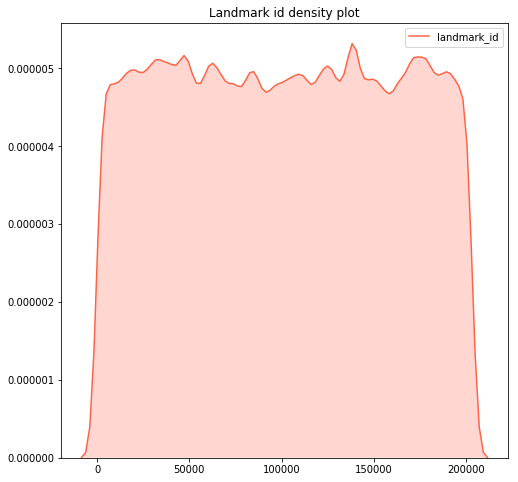

In [3]:
plt.figure(figsize = (8, 8))
plt.title('Landmark id density plot')
sns.kdeplot(train_df['landmark_id'], color="tomato", shade=True)
plt.show()

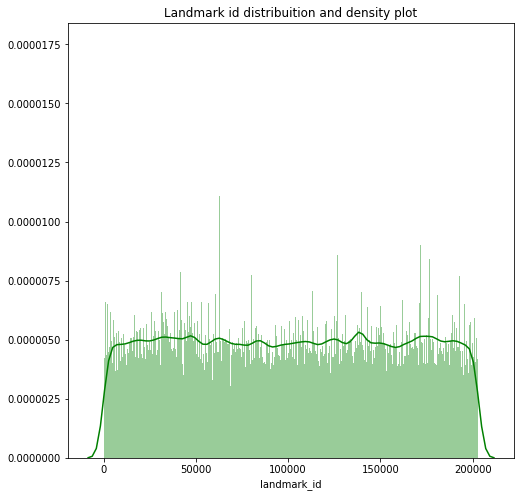

In [3]:
plt.figure(figsize = (8, 8))
plt.title('Landmark id distribuition and density plot')
sns.distplot(train_df['landmark_id'],color='green', kde=True,bins=1000)
plt.show()

In [5]:
th10 = pd.DataFrame(train_df.landmark_id.value_counts().head(1000))
th10.reset_index(level=0, inplace=True)
th10.columns = ['landmark_id','count']
min(th10['count'].tolist())

258

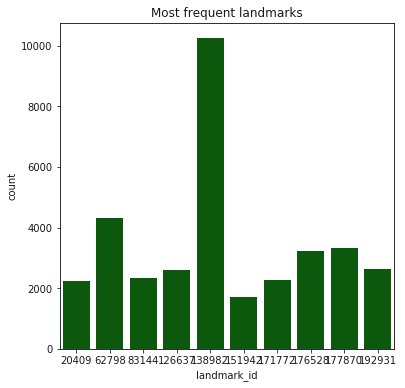

In [6]:
# Plot the most frequent landmark occurences
plt.figure(figsize = (6, 6))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=th10,
            label="Count", color="darkgreen")
plt.show()

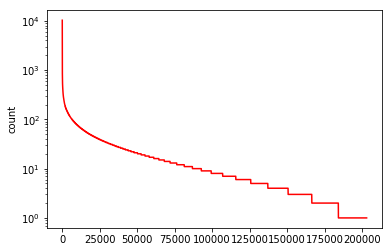

In [6]:
tb10 = pd.DataFrame(train_df.landmark_id.value_counts().tail(203094))
tb10.reset_index(level=0, inplace=True)
tb10.columns = ['landmark_id','count']
y = np.array(tb10['count'].tolist())
x = np.arange(203094)
plt.semilogy(x, y, c='r')
plt.ylabel('count')
plt.show()

In [ ]:
# Plot the least frequent landmark occurences
plt.figure(figsize = (6,6))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=tb10,
            label="Count", color="orange")
plt.show()

In [3]:
y_dict = train_df.groupby('landmark_id')['id'].apply(list).to_dict()

In [5]:
y_list = y_dict.keys()
print(len(y_list))

203094
